# 1. Baseline 살펴보기

본 페이지의 내용은 Exploration을 경험하신 여러분께는 매우 익숙한 형태로 제작되었습니다.

데이터는 Cifar10, 프로젝트 목표는 classification입니다.

Exploration과 동일하게 아래와 같은 플로우를 따릅니다.

1. Data set 준비
2. Data 분석
3. Data 전처리
4. Model 준비
5. Model 학습
6. Model 평가

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

## 1. Data set 준비

데이터는 keras에서 제공하는 Cifar10을 사용합니다.

In [2]:
# Data load

cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
# Validation Set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25)

## 2. Data 분석

본 풀잎 목적은 데이터 분석이 아니기 때문에 데이터 분석 방법은 Exploration에서 자주 사용하는 방식만을 사용했습니다.

In [4]:
X_train[1]

array([[[247, 247, 248],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [196, 187, 192],
        [141, 132, 139],
        [ 90,  80,  88]],

       [[255, 255, 254],
        [253, 253, 252],
        [255, 255, 254],
        ...,
        [173, 164, 163],
        [193, 185, 185],
        [166, 157, 160]],

       [[252, 253, 250],
        [251, 251, 250],
        [251, 251, 252],
        ...,
        [125, 116, 109],
        [156, 147, 141],
        [204, 194, 194]],

       ...,

       [[189, 175, 166],
        [177, 163, 154],
        [171, 157, 148],
        ...,
        [169, 151, 141],
        [134, 121, 105],
        [128, 115,  98]],

       [[191, 177, 168],
        [185, 171, 162],
        [183, 169, 160],
        ...,
        [167, 151, 143],
        [172, 159, 144],
        [131, 116,  99]],

       [[187, 174, 165],
        [184, 171, 162],
        [186, 172, 163],
        ...,
        [129, 115, 111],
        [182, 167, 155],
        [166, 150, 133]]

In [5]:
y_train[1]

array([3], dtype=uint8)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(37500, 32, 32, 3)
(37500, 1)
(12500, 32, 32, 3)
(12500, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
CLASS_NAMES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "hores", "ship", "truck"]

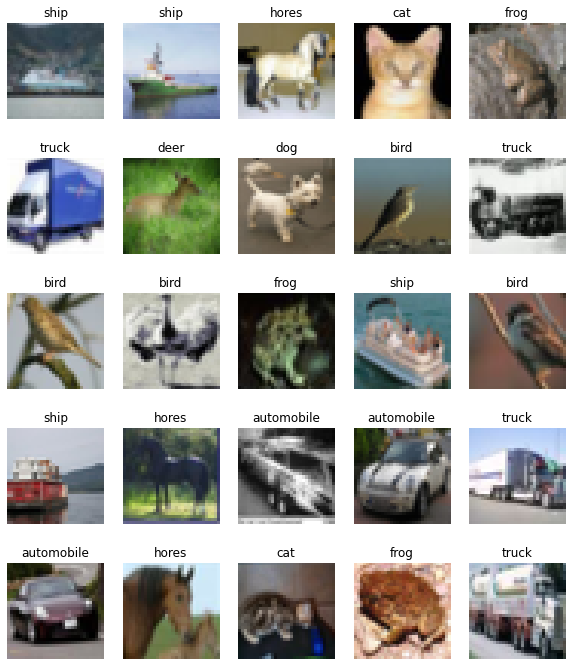

In [8]:
#시각화하기
#plt는 input 데이터의 크기를 [0,1] 또는 [0,255]을 맞춰준다.

plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    t = np.random.randint(len(X_train))
    sample = X_train[t]
    plt.imshow(sample)
    plt.title(f'{CLASS_NAMES[int(y_train[t])]}')
    plt.axis('off')

plt.show()

## 3. 데이터 전처리

In [9]:
# Normalization

X_train, X_val, X_test = X_train / 255., X_val / 255., X_test / 255.

## 4. Model 준비

In [10]:
# model 설계

tf.keras.backend.clear_session()

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(63, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(len(CLASS_NAMES), activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 63)        18207     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 63)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2268)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2323456   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## 5. Model 학습

In [12]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.005),
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [13]:
model.fit(X_train, y_train,
                    epochs = 5,
                    batch_size = 64,
                    validation_data = (X_val, y_val)
                    )

Epoch 1/5
586/586 [==============================] - 31s 6ms/step - loss: 1.5526 - accuracy: 0.4350 - val_loss: 1.3526 - val_accuracy: 0.5158
Epoch 2/5
586/586 [==============================] - 3s 4ms/step - loss: 1.2474 - accuracy: 0.5571 - val_loss: 1.2108 - val_accuracy: 0.5710
Epoch 3/5
586/586 [==============================] - 3s 4ms/step - loss: 1.1082 - accuracy: 0.6099 - val_loss: 1.2100 - val_accuracy: 0.5772
Epoch 4/5
586/586 [==============================] - 3s 4ms/step - loss: 0.9882 - accuracy: 0.6544 - val_loss: 1.1843 - val_accuracy: 0.5949
Epoch 5/5
586/586 [==============================] - 3s 4ms/step - loss: 0.8800 - accuracy: 0.6920 - val_loss: 1.2278 - val_accuracy: 0.5977


## 6. Model 평가

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 1.2156 - accuracy: 0.5972
test_loss: 1.215579628944397 
test_accuracy: 0.5971999764442444


In [19]:
predicted_result = model.predict(X_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', CLASS_NAMES[predicted_labels[idx]])
print('실제 데이터의 라벨 : ', CLASS_NAMES[int(y_test[idx])])

model.predict() 결과 :  [4.3098107e-03 4.0110006e-04 2.2157700e-01 6.0432130e-01 1.3465007e-02
 1.0295466e-01 4.5200665e-02 1.6596456e-03 4.5965654e-03 1.5142665e-03]
model이 추론한 가장 가능성이 높은 결과 :  cat
실제 데이터의 라벨 :  cat


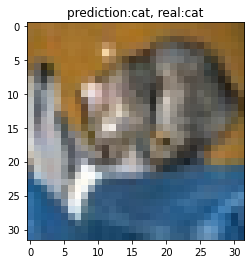

In [20]:
plt.imshow(X_test[idx],cmap=plt.cm.binary)
plt.title("prediction:" + CLASS_NAMES[predicted_labels[idx]] + ", real:" + CLASS_NAMES[int(y_test[idx])])
plt.show()

예측확률분포: [3.9476335e-02 7.3492008e-01 7.4238773e-03 2.1972612e-04 4.0321826e-04
 1.9518223e-04 8.1966119e-04 2.5547593e-04 1.7954303e-01 3.6743466e-02]
라벨: [0], 예측결과: cat


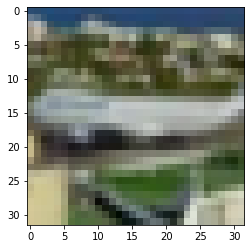

예측확률분포: [0.05090242 0.07527389 0.20645577 0.28501454 0.13147238 0.14718635
 0.02158211 0.0549592  0.01942723 0.00772616]
라벨: [4], 예측결과: cat


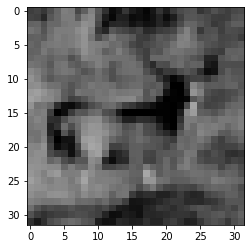

예측확률분포: [0.02015804 0.02373506 0.1047671  0.23068383 0.02989183 0.3717451
 0.04923425 0.02316989 0.12924449 0.01737039]
라벨: [3], 예측결과: cat


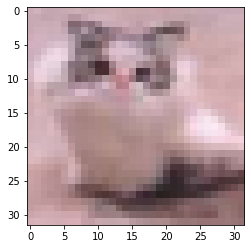

예측확률분포: [8.9068571e-03 8.7464447e-05 4.8855940e-01 1.2823697e-02 1.3092438e-02
 1.2255140e-01 3.0173799e-01 4.9235262e-02 4.2940589e-04 2.5761051e-03]
라벨: [7], 예측결과: cat


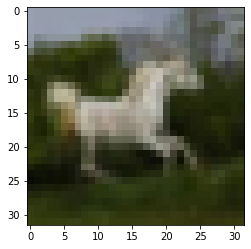

예측확률분포: [0.00392357 0.02613211 0.13335624 0.07957317 0.18205792 0.36009502
 0.03151534 0.10706977 0.00309566 0.07318115]
라벨: [9], 예측결과: cat


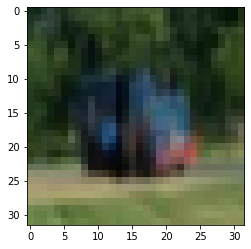

In [21]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + CLASS_NAMES[predicted_labels[idx]])
    plt.imshow(X_test[n], cmap=plt.cm.binary)
    plt.show()